<a href="https://colab.research.google.com/github/RithwikMohan/ML_Lab/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries and functions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading a dataset

In [ ]:
filepath2 = '/content/drive/MyDrive/Datasets/titanic_train.csv'
df2 = pd.read_csv(filepath2)
print(df2.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0] #checking for null values

['Age', 'Cabin', 'Embarked']

Constant Features (columns with constant values)

In [ ]:
# Select only numeric columns
numeric_cols = x_train2.select_dtypes(include=['number']).columns

# Find constant numeric features (std = 0)
constant_features2 = [col for col in numeric_cols if x_train2[col].std() == 0]

print(len(constant_features2))


0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume df is your original dataframe and y is the target variable
X = df2.drop('Age', axis=1)
y = df2['Age']

# Split the data into train and test sets
x_train2, x_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then you can find constant features on x_train2
numeric_cols = x_train2.select_dtypes(include=['number']).columns
constant_features2 = [col for col in numeric_cols if x_train2[col].std() == 0]

# Drop constant features from both train and test sets
x_train2.drop(labels=constant_features2, axis=1, inplace=True)
x_test2.drop(labels=constant_features2, axis=1, inplace=True)


Quasi Constant Features (98% of the values of a column are same or constant)

In [ ]:
quasi_constant_feature = []

for feature in x_train2.columns:
  predominant = (x_train2[feature].value_counts() / np.float64(len(x_train2))).sort_values(ascending=False).values[0]

  if predominant > 0.999:
    quasi_constant_feature.append(feature)

print(len(quasi_constant_feature))

0


In [ ]:
x_train2.drop(labels = quasi_constant_feature , axis=1 , inplace = True)
x_test2.drop(labels = quasi_constant_feature , axis=1 , inplace = True)

Duplicated Columns (Two or More Cols having same duplicated values)

In [ ]:
duplicated_feat = []

for i in range(0,len(x_train2.columns)):
  col_1 = x_train2.columns[i]
  for col_2 in x_train2.columns[i+1:]:
    if x_train2[col_1].equals(x_train2[col_2]):
      duplicated_feat.append(col_2)

print(duplicated_feat)

[]


In [ ]:
duplicated_features = list(set(duplicated_feat))
x_train2.drop(labels = duplicated_features , axis=1 , inplace = True)
x_test2.drop(labels = duplicated_features , axis=1 , inplace = True)

Corelation Heat Map

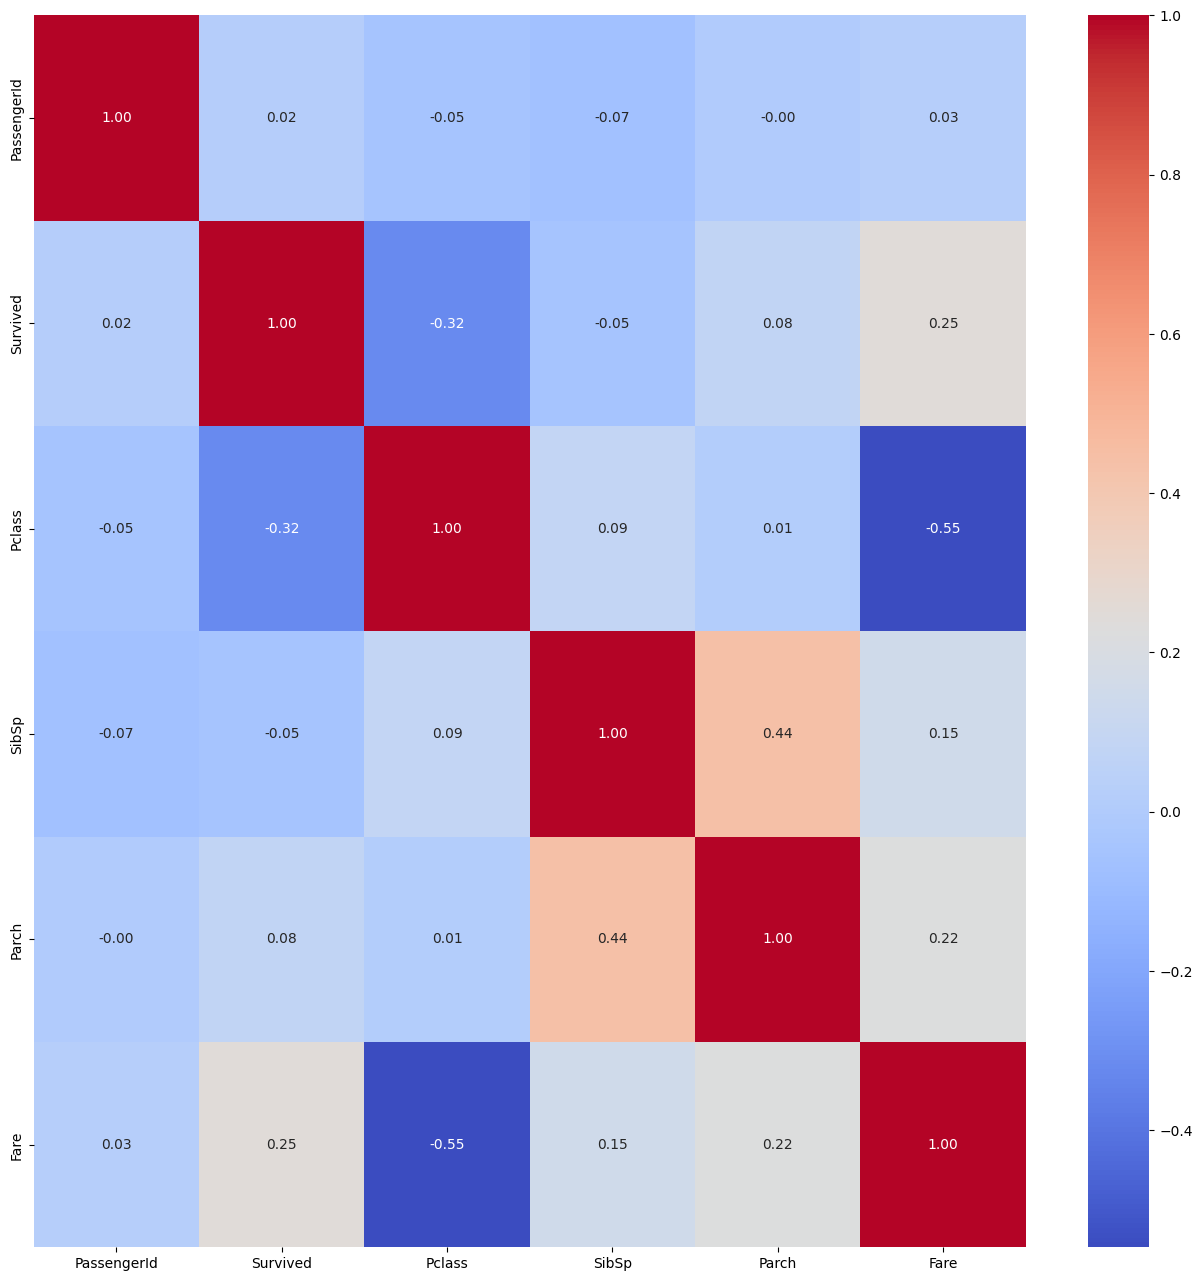

In [ ]:
numeric_cols = x_train2.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [ ]:
# Select only numeric columns to avoid errors during corr()
x_train_numeric = x_train2.select_dtypes(include=['number'])

# Your correlation function
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Find correlated features with correlation > 0.9
corr_features = correlation(x_train_numeric, 0.9)
correlated_features = list(set(corr_features))

# Print the results
print(f"Number of highly correlated features: {len(correlated_features)}")
print("List of correlated features:")
print(correlated_features)


Number of highly correlated features: 0
List of correlated features:
[]


In [ ]:
x_train2.drop(labels = correlated_features , axis=1 , inplace = True)
x_test2.drop(labels = correlated_features , axis=1 , inplace = True)

Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing target values
df_clean = df2.dropna(subset=['Age'])

# Separate features and target
X = df_clean.drop(columns=['Age']).copy()
Y = df_clean['Age']

# Encode categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Fill missing values in features
X = X.fillna(0)  # or X.fillna(X.mean())

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, Y, random_state=42)

# Create DataFrame and sort
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info Score': mi_scores})
mi_df = mi_df.sort_values('Mutual Info Score', ascending=False)

print(mi_df)


        Feature  Mutual Info Score
6         Parch           0.164853
7        Ticket           0.128245
8          Fare           0.112697
9         Cabin           0.079376
2        Pclass           0.065976
5         SibSp           0.042232
1      Survived           0.033811
10     Embarked           0.024064
4           Sex           0.015451
0   PassengerId           0.006856
3          Name           0.002424


Chi Square Test to select useful features

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import pandas as pd

# Assume df2 is your original DataFrame

# Drop rows where target is NaN
df_clean = df2.dropna(subset=['Age'])

# Separate features and target
X = df_clean.drop(columns=['Age']).copy()
Y = df_clean['Age']

# Convert Age into categories (5 bins)
Y_cat = pd.cut(Y, bins=5, labels=False)

# Encode categorical features in X
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Replace negative values with 0 (required by chi2)
X = X.clip(lower=0)

# Handle missing values in features (fill NaNs with 0)
X = X.fillna(0)

# Run chi2
chi_score, p_values = chi2(X, Y_cat)

# Create DataFrame of scores
chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi Square Score': chi_score,
    'P Value': p_values
})

# Sort by score descending
chi_df = chi_df.sort_values('Chi Square Score', ascending=False)

# Add decision column based on p-value threshold
chi_df['Decision'] = chi_df['P Value'].apply(lambda p: 'Reject Null Hypothesis' if p < 0.05 else 'Accept Null Hypothesis')

print(chi_df)


        Feature  Chi Square Score        P Value                Decision
8          Fare       1292.319066  1.539898e-278  Reject Null Hypothesis
7        Ticket       1091.905511  4.302101e-235  Reject Null Hypothesis
3          Name        772.599105  6.611242e-166  Reject Null Hypothesis
9         Cabin        501.796864  2.737921e-107  Reject Null Hypothesis
5         SibSp        255.262358   4.784422e-54  Reject Null Hypothesis
0   PassengerId        180.455871   5.951595e-38  Reject Null Hypothesis
6         Parch        150.316810   1.741154e-31  Reject Null Hypothesis
2        Pclass         33.404809   9.868930e-07  Reject Null Hypothesis
1      Survived          9.043864   6.001240e-02  Accept Null Hypothesis
4           Sex          4.987763   2.885554e-01  Accept Null Hypothesis
10     Embarked          2.388958   6.646237e-01  Accept Null Hypothesis


ANOVA

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import pandas as pd

# Drop rows where target is NaN
df_clean = df2.dropna(subset=['Age'])

# Separate features and target
X = df_clean.drop(columns=['Age'])
y = df_clean['Age']

# Encode target if categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

# Select only numeric features
X_num = X.select_dtypes(include=['number']).copy()

# Fill NaNs in numeric features with mean or 0 (you can choose)
X_num = X_num.fillna(X_num.mean())

# Perform ANOVA F-test
f_scores, p_values = f_classif(X_num, y)

# Create DataFrame with results
f_df = pd.DataFrame({'Feature': X_num.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort by F-Score descending
f_df = f_df.sort_values('F-Score', ascending=False)

print(f_df)


       Feature   F-Score       P-Value
3        SibSp  3.363287  1.675083e-18
4        Parch  2.575085  2.133242e-11
2       Pclass  2.396525  7.403295e-10
0  PassengerId  1.330708  3.081990e-02
1     Survived  1.228912  8.904782e-02
5         Fare  0.886992  7.543868e-01


In [ ]:
# Filter features with p-value less than 0.05 (significant features)
significant_features = f_df[f_df['P-Value'] < 0.05]['Feature'].tolist()

print(f"Selected features based on p-value < 0.05: {significant_features}")

# Now keep only these features in your X_num
X_num_filtered = X_num[significant_features]

# If you want, you can also filter the original dataframe like this:
X_filtered = X[significant_features]

# Your target y remains the same


Selected features based on p-value < 0.05: ['SibSp', 'Parch', 'Pclass', 'PassengerId']


In [ ]:
# Add a decision column based on p-value threshold 0.05
f_df['Decision'] = f_df['P-Value'].apply(lambda p: 'Reject Null Hypothesis' if p < 0.05 else 'Accept Null Hypothesis')

print(f_df[['Feature', 'F-Score', 'P-Value', 'Decision']])


       Feature   F-Score       P-Value                Decision
3        SibSp  3.363287  1.675083e-18  Reject Null Hypothesis
4        Parch  2.575085  2.133242e-11  Reject Null Hypothesis
2       Pclass  2.396525  7.403295e-10  Reject Null Hypothesis
0  PassengerId  1.330708  3.081990e-02  Reject Null Hypothesis
1     Survived  1.228912  8.904782e-02  Accept Null Hypothesis
5         Fare  0.886992  7.543868e-01  Accept Null Hypothesis
